<a href="https://colab.research.google.com/github/AdamShelby278/Major-Project-Smartkower/blob/main/Majorproject_GaneshDesai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAJOR PROJECT

Importing libraries

In [ ]:
import pandas as pd

Collecting data

In [ ]:
df = pd.read_csv('/content/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81432,ZWE,Africa,Zimbabwe,2021-04-09,37147.0,95.0,34.857,1535.0,3.0,1.571,2499.306,6.392,2.345,103.277,0.202,0.106,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2407.0,453512.0,30.513,0.162,1789.0,0.120,0.019,51.3,tests performed,206205.0,178237.0,27968.0,12528.0,11636.0,1.39,1.20,0.19,783.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81433,ZWE,Africa,Zimbabwe,2021-04-10,37273.0,126.0,51.714,1538.0,3.0,2.000,2507.783,8.477,3.479,103.479,0.202,0.135,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2167.0,455679.0,30.659,0.146,1944.0,0.131,0.027,37.6,tests performed,222733.0,193936.0,28797.0,16528.0,12831.0,1.50,1.30,0.19,863.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81434,ZWE,Africa,Zimbabwe,2021-04-11,37288.0,15.0,52.143,1538.0,0.0,1.857,2508.793,1.009,3.508,103.479,0.000,0.125,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257.0,456936.0,30.743,0.085,1964.0,0.132,0.027,37.7,tests performed,223492.0,194594.0,28898.0,759.0,12085.0,1.50,1.31,0.19,813.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.4

In [ ]:
df = df.mask(df.eq(0)).dropna(how='all', axis=1)
df = df[df['continent'].notna()]

Checking for Null Values

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                               1743
new_cases                                18260
new_cases_smoothed                        7566
total_deaths                             11097
new_deaths                               38684
new_deaths_smoothed                      24060
total_cases_per_million                   1743
new_cases_per_million                    18260
new_cases_smoothed_per_million            7578
total_deaths_per_million                 11097
new_deaths_per_million                   38684
new_deaths_smoothed_per_million          24208
reproduction_rate                        12685
icu_patients                             69441
icu_patients_per_million                 69441
hosp_patients                            67504
hosp_patients_per_million                67504
weekly_icu_ad

Cleaning data taking required columns

In [ ]:
df_new=df[['location','continent','date','total_cases','new_cases','total_deaths','new_deaths']]
df_new

,location,continent,date,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,Asia,2020-02-24,1.0,1.0,NaN,NaN
1,Afghanistan,Asia,2020-02-25,1.0,NaN,NaN,NaN
2,Afghanistan,Asia,2020-02-26,1.0,NaN,NaN,NaN
3,Afghanistan,Asia,2020-02-27,1.0,NaN,NaN,NaN
4,Afghanistan,Asia,2020-02-28,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
81432,Zimbabwe,Africa,2021-04-09,37147.0,95.0,1535.0,3.0
81433,Zimbabwe,Africa,2021-04-10,37273.0,126.0,1538.0,3.0
81434,Zimbabwe,Africa,2021-04-11,37288.0,15.0,1538.0,NaN
81435,Zimbabwe,Africa,2021-04-12,37307.0,19.0,1542.0,4.0


In [ ]:
df_new.isnull().sum()

location            0
continent           0
date                0
total_cases      1743
new_cases       18260
total_deaths    11097
new_deaths      38684
dtype: int64

2 dataframes

1. df1 - where null values are dropped
2. df2 - where null values are filled with mean values

In [ ]:
df1=df_new.dropna()
df2=df_new.fillna(df1.mean())

In [ ]:
df1.isnull().sum()
df2.isnull().sum()

location        0
continent       0
date            0
total_cases     0
new_cases       0
total_deaths    0
new_deaths      0
dtype: int64

Renaming and changing to required format

In [ ]:
df1 = df1.rename(columns={'date':'ds','total_cases':'y'})
df2 = df2.rename(columns={'date':'ds','total_cases':'y'})
df1['ds']=pd.to_datetime(df1['ds'])
df2['ds']=pd.to_datetime(df2['ds'])
df1['y'] = df1['y'].astype(int)
df2['y'] = df2['y'].astype(int)



In [ ]:
import matplotlib.pyplot as plt

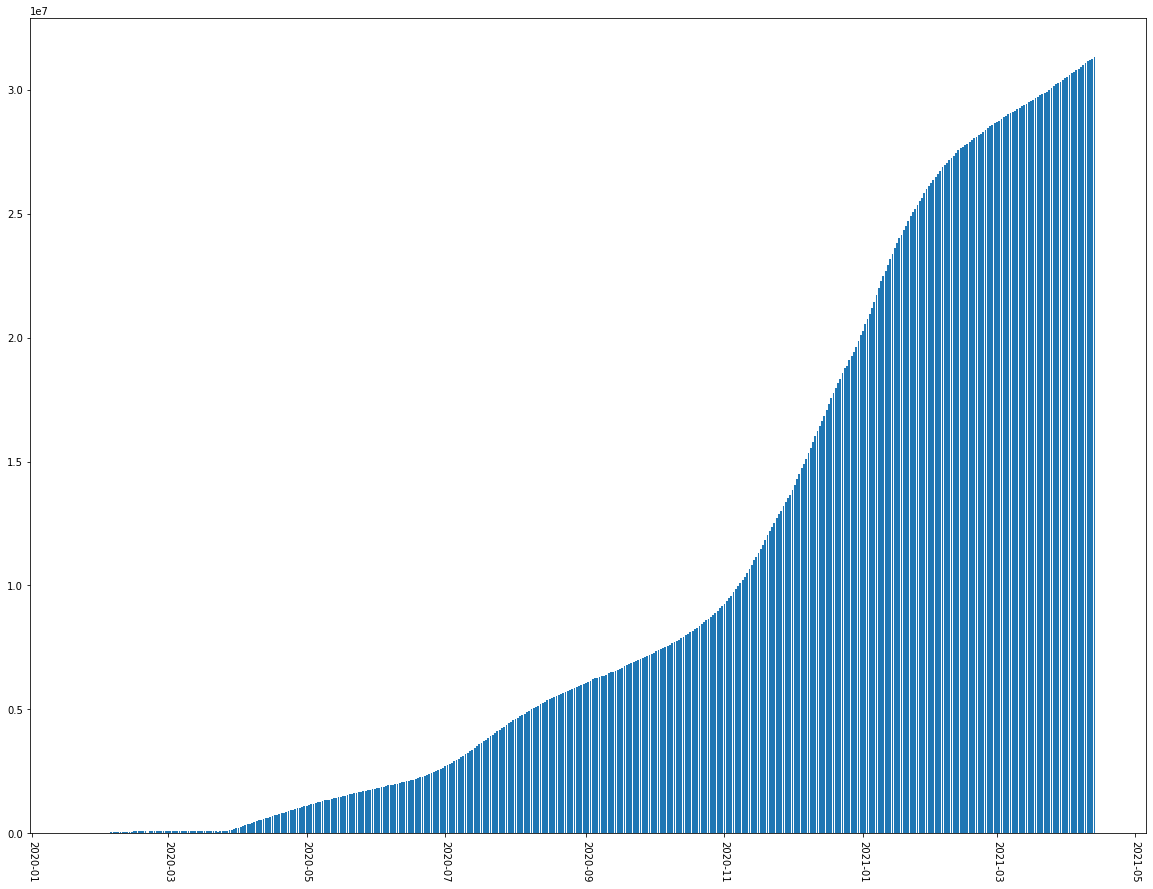

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(df1['ds'],df1['y'])
plt.xticks(rotation = -90)
plt.show()

Using FB prophet library for forcasting


In [ ]:
from fbprophet import Prophet

model1 = Prophet(changepoint_prior_scale=1)
model1.fit(df1)
forecast1 = model1.make_future_dataframe(periods=30,freq='D')
forecast1 = model1.predict(forecast1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Creating model

In [ ]:
from fbprophet import Prophet

model2 = Prophet(changepoint_prior_scale=1)
model2.fit(df2)
forecast2 = model2.make_future_dataframe(periods=30,freq='D')
forecast2 = model2.predict(forecast2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast1[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-23,-32635.758724,-2.425512e+06,2.468844e+06
1,2020-01-24,-24295.422321,-2.489563e+06,2.227451e+06
2,2020-01-25,-2559.265727,-2.348723e+06,2.273505e+06
3,2020-01-26,-6333.094230,-2.312062e+06,2.318599e+06
4,2020-01-27,-29831.944386,-2.425426e+06,2.417768e+06


In [ ]:
forecast2[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,258215.072562,-1.607673e+06,2.006506e+06
1,2020-01-02,255446.307628,-1.357352e+06,2.047914e+06
2,2020-01-03,252414.389944,-1.539313e+06,1.974851e+06
3,2020-01-04,249479.049903,-1.479706e+06,2.026349e+06
4,2020-01-05,246863.919796,-1.514285e+06,1.965307e+06


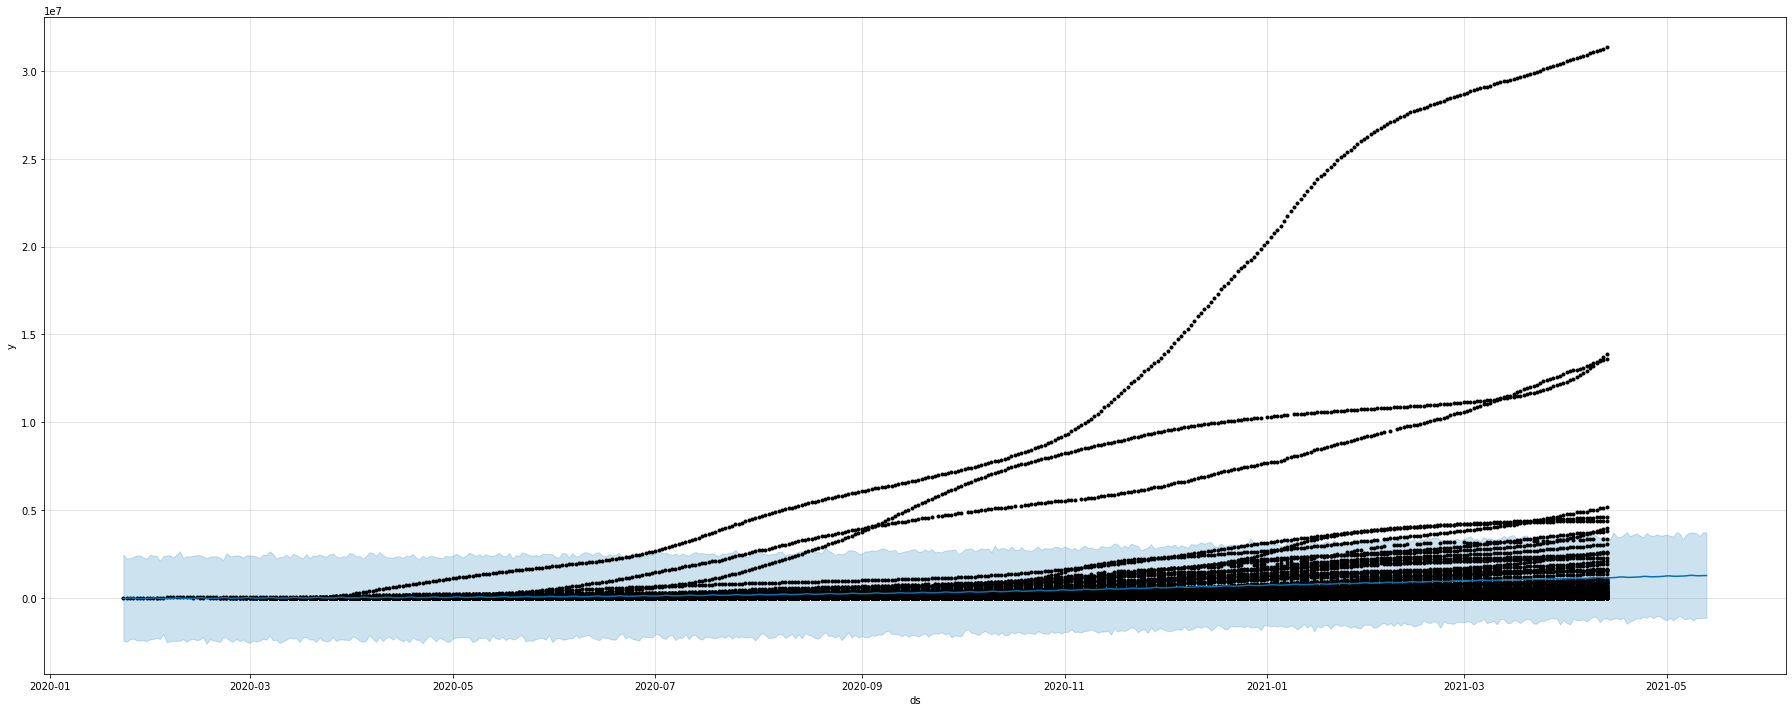

In [ ]:
import matplotlib.pyplot as plt

model1.plot(forecast1,figsize=(25,10));

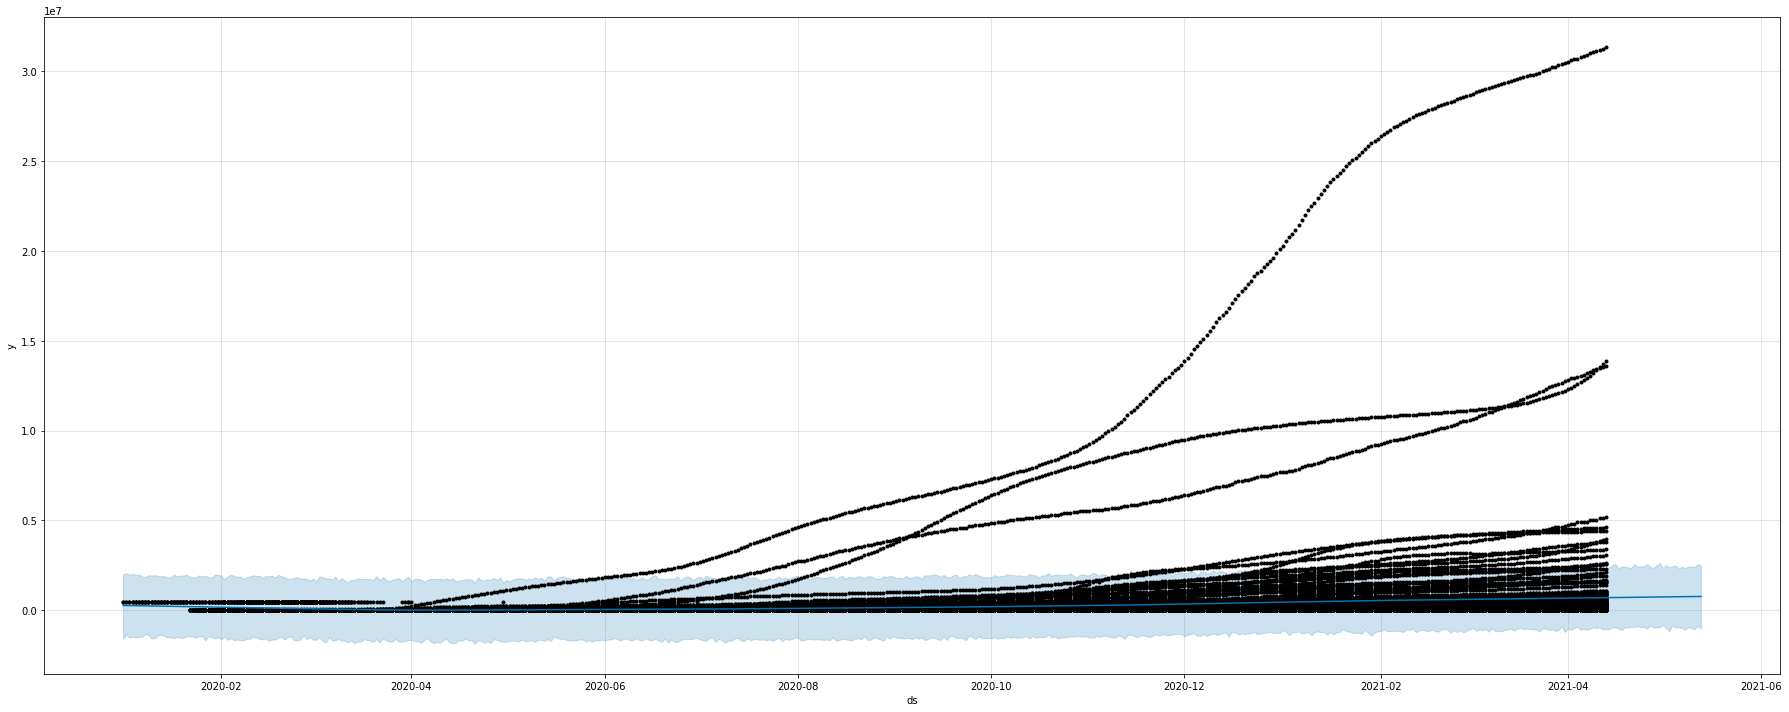

In [ ]:
model2.plot(forecast2,figsize=(25,10));

In [ ]:
#Both the graphs are almost similar

#QUESTIONS TO BE ANSWERED

In [ ]:
init_date = "2021-04-13"
filtered_dates = df_new["date"] >= init_date



In [ ]:
new_df = df_new.loc[filtered_dates]
new_df


,location,continent,date,total_cases,new_cases,total_deaths,new_deaths
414,Afghanistan,Asia,2021-04-13,57364.0,122.0,2529.0,NaN
1254,Albania,Europe,2021-04-13,128752.0,234.0,2326.0,5.0
1668,Algeria,Africa,2021-04-13,118799.0,154.0,3137.0,3.0
2076,Andorra,Europe,2021-04-13,12614.0,33.0,121.0,NaN
2466,Angola,Africa,2021-04-13,23697.0,148.0,554.0,NaN
...,...,...,...,...,...,...,...
79390,Venezuela,South America,2021-04-13,176972.0,1160.0,1815.0,20.0
79837,Vietnam,Asia,2021-04-13,2714.0,9.0,35.0,NaN
80654,Yemen,Asia,2021-04-13,5507.0,61.0,1073.0,5.0
81046,Zambia,Africa,2021-04-13,90218.0,154.0,1229.0,2.0


In [ ]:
new_df = new_df.fillna(0)
new_df

,location,continent,date,total_cases,new_cases,total_deaths,new_deaths
414,Afghanistan,Asia,2021-04-13,57364.0,122.0,2529.0,0.0
1254,Albania,Europe,2021-04-13,128752.0,234.0,2326.0,5.0
1668,Algeria,Africa,2021-04-13,118799.0,154.0,3137.0,3.0
2076,Andorra,Europe,2021-04-13,12614.0,33.0,121.0,0.0
2466,Angola,Africa,2021-04-13,23697.0,148.0,554.0,0.0
...,...,...,...,...,...,...,...
79390,Venezuela,South America,2021-04-13,176972.0,1160.0,1815.0,20.0
79837,Vietnam,Asia,2021-04-13,2714.0,9.0,35.0,0.0
80654,Yemen,Asia,2021-04-13,5507.0,61.0,1073.0,5.0
81046,Zambia,Africa,2021-04-13,90218.0,154.0,1229.0,2.0


Questions

Which country/state is having highest number of cases?

In [ ]:
column = new_df['total_cases']
max_index = column.idxmax()
highest_case=df_new.loc[max_index,:]
highest_case

location        United States
continent       North America
date               2021-04-13
total_cases        3.1346e+07
new_cases               77878
total_deaths           563446
new_deaths                823
Name: 77643, dtype: object

Which country/state is having lowest number of cases?

In [ ]:
column = new_df['total_cases']
min_index = column.idxmin()
lowest_case=df_new.loc[min_index,:]
lowest_case

location        Cayman Islands
continent        North America
date                2021-04-13
total_cases                NaN
new_cases                  NaN
total_deaths               NaN
new_deaths                 NaN
Name: 14224, dtype: object

Which country/state is having lowest number of deaths?

In [ ]:
column = new_df['total_deaths']
min_death = column.idxmin()
lowest_death=df_new.loc[min_death,:]
lowest_death

location        Cayman Islands
continent        North America
date                2021-04-13
total_cases                NaN
new_cases                  NaN
total_deaths               NaN
new_deaths                 NaN
Name: 14224, dtype: object

Which country/state is having highest number of deaths?

In [ ]:
column = new_df['total_deaths']
max_death = column.idxmax()
highest_death=df_new.loc[max_death,:]
highest_death

location        United States
continent       North America
date               2021-04-13
total_cases        3.1346e+07
new_cases               77878
total_deaths           563446
new_deaths                823
Name: 77643, dtype: object